In [5]:
import pandas as pd

# df = pd.read_excel("엑셀 파일 경로", sheet_name = 불러올 시트의 인덱스)
df = pd.read_excel("CleanNetAddress.xlsx", sheet_name=1)

# 시작점과 10개의 노드의 위도 경도를 설정
start_point = (36.420971, 127.423380)  # (유)오성알씨의 위도 경도.
nodes = [start_point]

# nodes 배열에 크린넷 위치 삽입
for index, row in df.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    nodes.append((latitude, longitude))

[(36.420971, 127.42338),
 (36.3317391043375, 127.344830399223),
 (36.3316653798501, 127.341095936769),
 (36.3309804675651, 127.341795622727),
 (36.3302687680241, 127.341209799864),
 (36.3299894059564, 127.341208581748),
 (36.3290685598943, 127.341783707999),
 (36.3281330632071, 127.341178213471),
 (36.331568, 127.340586),
 (36.3303633575541, 127.339639822247),
 (36.330755, 127.339645),
 (36.331162, 127.339642),
 (36.3309339691769, 127.33862877734),
 (36.3318269660257, 127.339416515096),
 (36.3309367419624, 127.337648680487),
 (36.3309395067112, 127.3366685835),
 (36.330368, 127.336639),
 (36.3304670097003, 127.335646352477),
 (36.3299501448166, 127.335627986191),
 (36.3291562206251, 127.33562268777),
 (36.330679, 127.334513),
 (36.3312295101532, 127.333549397711),
 (36.3294391943224, 127.334528539239),
 (36.3294391943224, 127.334528539239),
 (36.3255589161457, 127.346323345649),
 (36.32615, 127.346237),
 (36.326292, 127.345567),
 (36.3267388192882, 127.347383129368),
 (36.32505, 127.34

In [25]:
import import_ipynb
import CVRP

CVRP.main()

# 가짜 데이터
result = [[0, 1, 3, 6, 8, 0], [0, 28, 31, 29, 35, 40, 0]]

Objective: 4384
Route for vehicle 0:
 0 Load(0) ->  0 Load(0)
Distance of the route: 0m
Load of the route: 0

Route for vehicle 1:
 0 Load(0) ->  9 Load(1) ->  5 Load(3) ->  8 Load(11) ->  6 Load(15) ->  2 Load(16) ->  10 Load(18) ->  16 Load(26) ->  14 Load(30) ->  13 Load(34) ->  12 Load(36) ->  11 Load(37) ->  15 Load(45) ->  3 Load(47) ->  4 Load(51) ->  1 Load(52) ->  7 Load(60) ->  0 Load(60)
Distance of the route: 4384m
Load of the route: 60

Total distance of all routes: 4384m
Total load of all routes: 60


In [26]:

# https://sksdudtjs.tistory.com/28
import matplotlib.colors as mcolors

def get_color(df_id):
    a = df_id%10
    return color_id[a]

color_dict = (mcolors.TABLEAU_COLORS, "CSS Colors")[0]

color_id = dict()
for id, color in enumerate(color_dict.values()):
  color_id[id] = color
color_dict


{'tab:blue': '#1f77b4',
 'tab:orange': '#ff7f0e',
 'tab:green': '#2ca02c',
 'tab:red': '#d62728',
 'tab:purple': '#9467bd',
 'tab:brown': '#8c564b',
 'tab:pink': '#e377c2',
 'tab:gray': '#7f7f7f',
 'tab:olive': '#bcbd22',
 'tab:cyan': '#17becf'}

In [27]:
import folium
from folium import plugins

# 지도 객체 생성
m = folium.Map(location=start_point, zoom_start=15)

# 노드 마커 추가
for i, node in enumerate(nodes):
    if i == 0 :
        folium.Marker(start_point, popup="Start Point", icon=folium.Icon(color='red')).add_to(m)
    else :
        folium.Marker(node, popup=f"Node {i+1}",
        icon = plugins.BeautifyIcon(icon="arrow-down",icon_shape="circle", border_width=3, number=i),
        tooltip = i).add_to(m)

for i, path in enumerate(result) :
    cc = get_color(i)  # color
    path_coords = []
    for i in path :
        path_coords.append(nodes[i])
    folium.PolyLine(path_coords, color=cc, weight=2.5, opacity=1).add_to(m)

# 지도 파일로 저장
m.save("map_with_nodes.html")

m

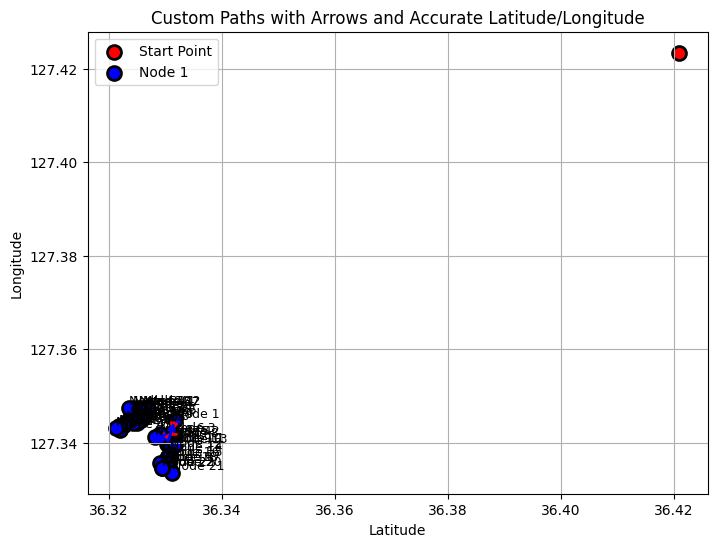

In [11]:
# import matplotlib.pyplot as plt

# # 위도와 경도를 그대로 사용한 좌표 평면 그래프
# plt.figure(figsize=(8, 6))

# # 시작점과 모든 노드 플로팅 (동그라미로 표시)
# plt.scatter(*start_point, color='red', label='Start Point', s=100, edgecolor='black', linewidth=2, marker='o')  
# for i, node in enumerate(nodes):
#     plt.scatter(*node, color='blue', label=f'Node {i+1}' if i == 0 else "", s=100, edgecolor='black', linewidth=2, marker='o')
#     plt.text(node[0], node[1], f'Node {i+1}', fontsize=9, verticalalignment='bottom')

# # 0 -> 2 -> 4 -> 7 순서로 빨간색 화살표 추가
# path1 = [0, 2, 4, 7]
# for i in range(len(path1) - 1):
#     node_start = nodes[path1[i]]
#     node_end = nodes[path1[i+1]]
#     plt.annotate('', xy=node_end, xytext=node_start,
#                  arrowprops=dict(color='red', arrowstyle='->', lw=2))

# # 4 -> 6 -> 8 -> 0 순서로 파란색 화살표 추가
# path2 = [4, 6, 8, 0]
# for i in range(len(path2) - 1):
#     node_start = nodes[path2[i]]
#     node_end = nodes[path2[i+1]]
#     plt.annotate('', xy=node_end, xytext=node_start,
#                  arrowprops=dict(color='blue', arrowstyle='->', lw=2))

# # 축 레이블 설정 (위도와 경도 그대로 사용)
# plt.xlabel("Latitude")
# plt.ylabel("Longitude")

# # 지수 표기법 제거
# plt.ticklabel_format(useOffset=False, style='plain')

# # 범례 추가
# plt.legend()

# # 제목 추가
# plt.title("Custom Paths with Arrows and Accurate Latitude/Longitude")

# # 그래프 출력
# plt.grid(True)
# plt.show()
